<a href="https://colab.research.google.com/github/derrickgzq/fyp/blob/main/fyp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Granger-causality for PPI and CPI in Malaysia


In [ ]:
!pip install pmdarima

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
import plotly.express as px
#from pmdarima.arima import auto_arima

Get data from github

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/derrickgzq/fyp/main/fyp%20data.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date').rename_axis('Indexes', axis=1)
df = df.loc['2015-01-01':'2022-12-01']

In [14]:
URL_DATA = 'https://storage.dosm.gov.my/cpi/cpi_core.parquet'

df_cpi_only = pd.read_parquet(URL_DATA)
if 'date' in df_cpi_only.columns: df_cpi_only['date'] = pd.to_datetime(df_cpi_only['date'])
df_cpi_only = df_cpi_only.set_index('date').rename_axis('Indexes', axis=1)
df_cpi_only = df_cpi_only[['overall']].loc['2021-01-01':'2023-08-01']

In [15]:
df_cpi_only

Indexes,overall
date,
2021-01-01,121.0
2021-02-01,121.0
2021-03-01,121.2
2021-04-01,121.3
2021-05-01,121.4
2021-06-01,121.4
2021-07-01,121.3
2021-08-01,121.5
2021-09-01,121.6


EDA

In [ ]:
df.head()

Indexes,PPI,CPI
date,,
2015-01-01,104.1,110.6
2015-02-01,104.6,109.9
2015-03-01,103.8,110.9
2015-04-01,103.1,111.9
2015-05-01,101.6,112.3


In [ ]:
df.tail()

Indexes,PPI,CPI
date,,
2022-08-01,120.9,128.2
2022-09-01,119.2,128.3
2022-10-01,119.3,128.6
2022-11-01,120.0,129.0
2022-12-01,119.6,129.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2015-01-01 to 2022-12-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PPI     96 non-null     float64
 1   CPI     96 non-null     float64
dtypes: float64(2)
memory usage: 2.2 KB


In [ ]:
df.describe()

Indexes,PPI,CPI
count,96.000000,96.000000
mean,107.309375,120.007292
std,6.419232,4.339906
min,99.000000,109.900000
25%,102.675000,117.400000
50%,106.300000,120.650000
75%,109.000000,122.400000
max,124.100000,129.200000


Visualizations

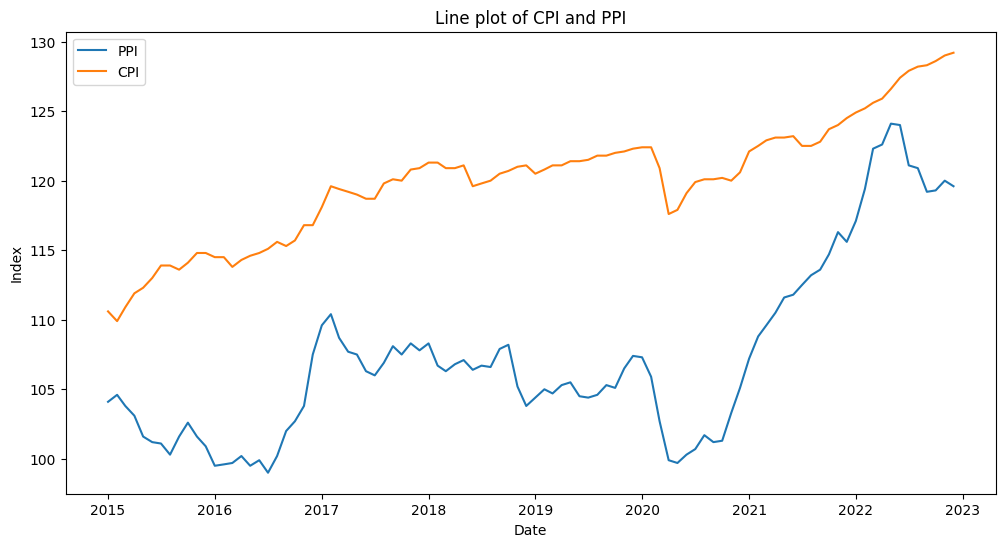

In [ ]:
plt.figure(figsize = (12, 6))
plt.plot(df)
plt.xlabel('Date')
plt.ylabel('Index')
plt.title('Line plot of CPI and PPI')
plt.legend(df)
plt.show()

Test for stationarity

In [ ]:
def adf_test(df):
    result = adfuller(df.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
def kpss_test(df):
    statistic, p_value, n_lags, critical_values = kpss(df.values)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')

In [ ]:
print('ADF Test: PPI time series')
adf_test(df['PPI'])
print(' ')
print('ADF Test: CPI time series')
adf_test(df['CPI'])

ADF Test: PPI time series
ADF Statistics: -0.923992
p-value: 0.779969
 
ADF Test: CPI time series
ADF Statistics: -0.804085
p-value: 0.817919


ADF tests show PPI and CPI aren't stationary

In [ ]:
print('KPSS Test: PPI time series')
kpss_test(df['PPI'])
print('KPSS Test: CPI time series')
kpss_test(df['CPI'])

KPSS Test: PPI time series
KPSS Statistic: 0.9090131609515705
p-value: 0.01
num lags: 5
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
KPSS Test: CPI time series
KPSS Statistic: 1.4444224903130523
p-value: 0.01
num lags: 5
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739


<ipython-input-12-b4a13b7d81a1>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(df.values)
<ipython-input-12-b4a13b7d81a1>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(df.values)


In [ ]:
df_diff = df.diff().dropna()

In [ ]:
fig = px.line(df_diff, facet_col = 'Indexes', facet_col_wrap = 1)
fig.update_yaxes(matches = None)
fig.show()

In [ ]:
print('KPSS Test: PPI time series')
kpss_test(df_diff['PPI'])
print('\nKPSS Test: CPI time series')
kpss_test(df_diff['CPI'])
print('\nADF Test: PPI time series')
adf_test(df_diff['PPI'])
print('\nADF Test: CPI time series')
adf_test(df_diff['CPI'])

KPSS Test: PPI time series
KPSS Statistic: 0.15618995760126497
p-value: 0.1
num lags: 4
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739

KPSS Test: CPI time series
KPSS Statistic: 0.11404346308216431
p-value: 0.1
num lags: 1
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739

ADF Test: PPI time series
ADF Statistics: -6.051938
p-value: 0.000000

ADF Test: CPI time series
ADF Statistics: -6.970126
p-value: 0.000000


<ipython-input-12-b4a13b7d81a1>:2: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


<ipython-input-12-b4a13b7d81a1>:2: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




ARIMA model

In [ ]:
#CPI
cpi = auto_arima(df_diff[['CPI']], seasonal = True, m = 12, stepwise = True, suppress_warnings = True, error_action = 'ignore',
                   information_criterion='aic')

In [ ]:
print(cpi.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   95
Model:               SARIMAX(0, 0, 1)   Log Likelihood                 -83.533
Date:                Sat, 11 Nov 2023   AIC                            173.065
Time:                        08:09:28   BIC                            180.727
Sample:                    02-01-2015   HQIC                           176.161
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1909      0.100      1.908      0.056      -0.005       0.387
ma.L1          0.4090      0.073      5.622      0.000       0.266       0.552
sigma2         0.3392      0.032     10.508      0.0

In [ ]:
#PPI
ppi = auto_arima(df_diff[['PPI']], seasonal = True, m = 12, stepwise = True, suppress_warnings = True, error_action = 'ignore',
                   information_criterion='aic')

In [ ]:
print(ppi.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   95
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -144.156
Date:                Sat, 11 Nov 2023   AIC                            292.312
Time:                        08:09:37   BIC                            297.420
Sample:                    02-01-2015   HQIC                           294.376
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4356      0.102      4.274      0.000       0.236       0.635
sigma2         1.2150      0.167      7.284      0.000       0.888       1.542
Ljung-Box (L1) (Q):                   0.01   Jarque-

VAR model

In [ ]:
model = VAR(df_diff)
for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
  results = model.fit(i)
  print('Lag Order =', i)
  print('AIC : ', results.aic)
  print('BIC : ', results.bic)
  print('FPE : ', results.fpe, '\n')

Lag Order = 1
AIC :  -0.9227569488437204
BIC :  -0.7604189840179754
FPE :  0.39743909397230165 

Lag Order = 2
AIC :  -0.9369135747376378
BIC :  -0.6645910485921265
FPE :  0.3919166811798592 

Lag Order = 3
AIC :  -0.8887847855664883
BIC :  -0.5050343499285909
FPE :  0.4113974811694055 

Lag Order = 4
AIC :  -0.8395716526813531
BIC :  -0.3429181239197785
FPE :  0.4324562253318811 

Lag Order = 5
AIC :  -0.7967766272999735
BIC :  -0.18571204121924212
FPE :  0.45188832988945915 

Lag Order = 6
AIC :  -0.7326417019157719
BIC :  -0.005624335477169229
FPE :  0.48266501395287065 

Lag Order = 7
AIC :  -0.6531515810293942
BIC :  0.19139506026999453
FPE :  0.5239124605244182 

Lag Order = 8
AIC :  -0.6115180074163926
BIC :  0.3521702228624102
FPE :  0.5480789743530025 

Lag Order = 9
AIC :  -0.5203544951407326
BIC :  0.564124542738724
FPE :  0.6031797922024613 

Lag Order = 10
AIC :  -0.484181822370358
BIC :  0.7227752690719158
FPE :  0.6292006372633947 

Lag Order = 11
AIC :  -0.3767050016556

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Compare between ARIMA dan VAR, VAR model is way better, in terms of AIC and BIC already, so we will proceed with VAR.

Lag order 2 is chose because lowest AIC and FPE

In [ ]:
results = model.fit(maxlags = 2)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 12, Nov, 2023
Time:                     13:09:56
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                  -0.664591
Nobs:                     93.0000    HQIC:                 -0.826958
Log likelihood:          -210.356    FPE:                   0.391917
AIC:                    -0.936914    Det(Omega_mle):        0.352945
--------------------------------------------------------------------
Results for equation PPI
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const          0.147229         0.126315            1.166           0.244
L1.PPI         0.461405         0.109663            4.207           0.000
L1.CPI        -0.124266         0.216483           -0.574           0.566
L2.PPI         0

## Check whether is PPI a predictive of CPI

## Granger-Causality matrix

In [ ]:
maxlag = 2
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):

    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df_diff, variables = df_diff.columns)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results



,PPI_x,CPI_x
PPI_y,1.0000,0.5306
CPI_y,0.0006,1.0000


Lets compare in terms of the state with highest and lowest GDP (Selangor and Perlis)

In [2]:
df_state = pd.read_csv('https://raw.githubusercontent.com/derrickgzq/fyp/main/data%20of%20states%20cpi_completed.csv')

In [3]:
df_state = df_state[['Date', 'Selangor', 'Perlis','PPI']]

In [4]:
df_state['Date'] = pd.to_datetime(df_state['Date'])
df_state = df_state.set_index('Date').rename_axis('Indexes', axis=1)

In [ ]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2021-01-01 to 2023-08-01
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Selangor  32 non-null     float64
 1   Perlis    32 non-null     float64
 2   PPI       32 non-null     float64
dtypes: float64(3)
memory usage: 1.0 KB


In [ ]:
df_state.head()

Indexes,Selangor,Perlis,PPI
Date,,,
2021-01-01,125.7,115.5,107.2
2021-02-01,126.0,115.9,108.8
2021-03-01,126.5,116.2,109.6
2021-04-01,126.6,116.2,110.5
2021-05-01,126.7,116.3,111.6


In [6]:
dfs = df_state

In [ ]:
dfs.head()

Indexes,Selangor,Perlis,PPI
Date,,,
2021-01-01,125.7,115.5,107.2
2021-02-01,126.0,115.9,108.8
2021-03-01,126.5,116.2,109.6
2021-04-01,126.6,116.2,110.5
2021-05-01,126.7,116.3,111.6


In [20]:
print(dfs.shape)
print(df_cpi_only.shape)

(32, 3)
(32, 1)


In [24]:
merged_df = pd.concat([dfs, df_cpi_only],axis =1)
merged_df.head()

Indexes,Selangor,Perlis,PPI,overall
2021-01-01,125.7,115.5,107.2,121.0
2021-02-01,126.0,115.9,108.8,121.0
2021-03-01,126.5,116.2,109.6,121.2
2021-04-01,126.6,116.2,110.5,121.3
2021-05-01,126.7,116.3,111.6,121.4


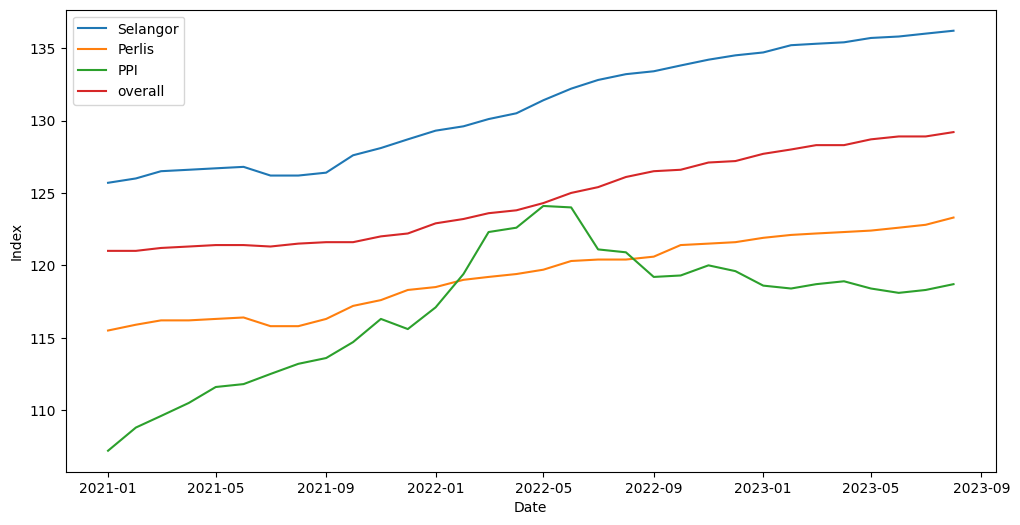

In [26]:
plt.figure(figsize = (12, 6))
plt.plot(merged_df)
plt.xlabel('Date')
plt.ylabel('Index')
plt.legend(merged_df)
plt.show()

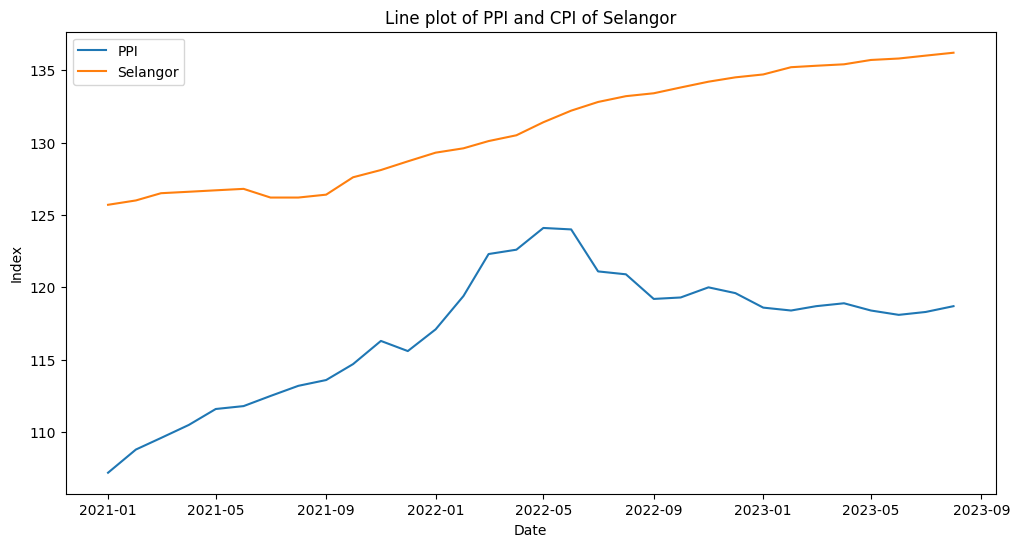

In [ ]:
plt.figure(figsize = (12, 6))
plt.plot(dfs[['PPI','Selangor']])
plt.xlabel('Date')
plt.ylabel('Index')
plt.title('Line plot of PPI and CPI of Selangor')
plt.legend(dfs[['PPI','Selangor']])
plt.show()

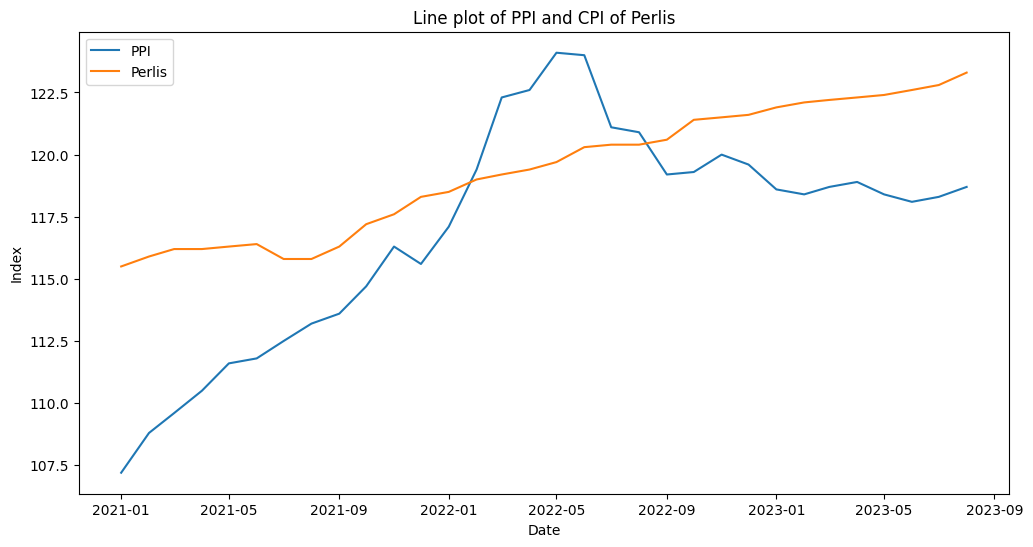

In [ ]:
plt.figure(figsize = (12, 6))
plt.plot(dfs[['PPI','Perlis']])
plt.xlabel('Date')
plt.ylabel('Index')
plt.title('Line plot of PPI and CPI of Perlis')
plt.legend(dfs[['PPI','Perlis']])
plt.show()

In [ ]:
dfs.head()

Indexes,Selangor,Perlis,PPI
Date,,,
2021-01-01,125.7,115.5,107.2
2021-02-01,126.0,115.9,108.8
2021-03-01,126.5,116.2,109.6
2021-04-01,126.6,116.2,110.5
2021-05-01,126.7,116.3,111.6


Detrend

In [ ]:
from scipy import signal

In [ ]:
def detrend_polynomial(column, degree = 1):
    x = np.arange(len(column))
    p = np.polyfit(x, column, degree)
    trend = np.polyval(p, x)
    return column - trend

In [ ]:
dfs['Selangor_dtrend'] = detrend_polynomial(dfs['Selangor'])

In [ ]:
dfs.head()

Indexes,Selangor,Perlis,PPI,Selangor_dtrend
Date,,,,
2021-01-01,125.7,115.5,107.2,0.848295
2021-02-01,126.0,115.9,108.8,0.754051
2021-03-01,126.5,116.2,109.6,0.859806
2021-04-01,126.6,116.2,110.5,0.565561
2021-05-01,126.7,116.3,111.6,0.271316


In [ ]:
adf_test(dfs['Selangor_dtrend'])
kpss_test(dfs['Selangor_dtrend'])

ADF Statistics: -3.429663
p-value: 0.009988
KPSS Statistic: 0.11157052539359852
p-value: 0.1
num lags: 3
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739


<ipython-input-3-0e6af41d160b>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(df.values)


In [ ]:
dfs_nosel = dfs[['PPI','Perlis']]
dfs_sel = dfs[['Selangor_dtrend']].iloc[1:]

In [ ]:
dfs_nosel_diff = dfs_nosel.diff().dropna()

In [ ]:
dfs_diff = pd.concat([dfs_nosel_diff, dfs_sel], axis = 1)

In [ ]:
dfs_diff.head(3)

Indexes,PPI,Perlis,Selangor_dtrend
Date,,,
2021-02-01,1.6,0.4,0.754051
2021-03-01,0.8,0.3,0.859806
2021-04-01,0.9,0.0,0.565561


In [ ]:
dfs_diff = dfs.diff().dropna()

In [ ]:
for i in dfs.columns:
  print('ADF test for ',i)
  adf_test(dfs[i])
  print('\nKPSS test for ',i)
  kpss_test(dfs[i])
  print(' ')

ADF test for  Selangor
ADF Statistics: -2.359542
p-value: 0.153482

KPSS test for  Selangor
KPSS Statistic: 0.7278426866871425
p-value: 0.011014301210259774
num lags: 4
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
 
ADF test for  Perlis
ADF Statistics: -2.365374
p-value: 0.151749

KPSS test for  Perlis
KPSS Statistic: 0.8889292438867461
p-value: 0.01
num lags: 3
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
 
ADF test for  PPI
ADF Statistics: -1.978316
p-value: 0.296161

KPSS test for  PPI
KPSS Statistic: 0.5784890651892486
p-value: 0.024591903164613762
num lags: 3
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
 
ADF test for  Selangor_dtrend
ADF Statistics: -3.429663
p-value: 0.009988

KPSS test for  Selangor_dtrend
KPSS Statistic: 0.11157052539359852
p-value: 0.1
num lags: 3
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
 


<ipython-input-3-0e6af41d160b>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(df.values)
<ipython-input-3-0e6af41d160b>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(df.values)


In [ ]:
for i in dfs_diff.columns:
  print('ADF test for ',i)
  adf_test(dfs_diff[i])
  print('\nKPSS test for ',i)
  kpss_test(dfs_diff[i])
  print(' ')

ADF test for  PPI
ADF Statistics: -3.777777
p-value: 0.003143

KPSS test for  PPI
KPSS Statistic: 0.426668152037163
p-value: 0.0656602792943263
num lags: 2
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
 
ADF test for  Perlis
ADF Statistics: -4.068523
p-value: 0.001091

KPSS test for  Perlis
KPSS Statistic: 0.08041330053392216
p-value: 0.1
num lags: 1
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
 
ADF test for  Selangor_dtrend
ADF Statistics: -3.224819
p-value: 0.018592

KPSS test for  Selangor_dtrend
KPSS Statistic: 0.12779941301479006
p-value: 0.1
num lags: 3
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
 


<ipython-input-3-0e6af41d160b>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(df.values)
<ipython-input-3-0e6af41d160b>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(df.values)


In [ ]:
dfs_diff = dfs_diff.diff().dropna()

In [ ]:
fig = px.line(dfs_diff, facet_col = 'Indexes', facet_col_wrap = 1)
fig.update_yaxes(matches = None)
fig.show()

In [ ]:
dfs_diff.head()

Indexes,PPI,Perlis,Selangor_dtrend
Date,,,
2021-02-01,1.6,0.4,0.754051
2021-03-01,0.8,0.3,0.859806
2021-04-01,0.9,0.0,0.565561
2021-05-01,1.1,0.1,0.271316
2021-06-01,0.2,0.1,-0.022929


Selangor and Perlis

In [ ]:
model_p = VAR(dfs_diff)
for i in [1,2,3,4,5,6]:
  results = model_p.fit(i)
  print('Lag Order =', i)
  print('AIC : ', results.aic)
  print('BIC : ', results.bic)
  print('FPE : ', results.fpe, '\n')

Lag Order = 1
AIC :  -5.298672391856068
BIC :  -4.738193439191206
FPE :  0.005022233961219049 

Lag Order = 2
AIC :  -4.9184487220580495
BIC :  -3.928337948619568
FPE :  0.007526725977749464 

Lag Order = 3
AIC :  -4.944006084038065
BIC :  -3.5166441088503464
FPE :  0.007865886601163096 

Lag Order = 4
AIC :  -4.824405034190251
BIC :  -2.952640672183997
FPE :  0.010422091431690005 

Lag Order = 5
AIC :  -5.589708399271886
BIC :  -3.2670686367706887
FPE :  0.006896353290502836 

Lag Order = 6
AIC :  -7.6024868633710785
BIC :  -4.823449982671582
FPE :  0.00205969705165151 



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [ ]:
results = model_p.fit(maxlags = 6)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 02, Dec, 2023
Time:                     04:37:54
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -4.82345
Nobs:                     25.0000    HQIC:                  -6.83170
Log likelihood:           45.6107    FPE:                 0.00205970
AIC:                     -7.60249    Det(Omega_mle):     0.000377803
--------------------------------------------------------------------
Results for equation PPI
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                     -3.007971         1.821682           -1.651           0.099
L1.PPI                    -0.607497         0.263578           -2.305           0.021
L1.Perlis                  0.928477       

Lag order 1 is the best, with lowest AIC, BIC and FPE

In [ ]:
maxlag = 6
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):

    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(dfs_diff, variables = dfs_diff.columns)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1

,PPI_x,Perlis_x,Selangor_dtrend_x
PPI_y,1.0000,0.2939,0.0
Perlis_y,0.1074,1.0000,0.0
Selangor_dtrend_y,0.1029,0.0007,1.0


Selangor

In [ ]:
dfs_diff.head(2)

Indexes,PPI,Perlis,Selangor_dtrend
Date,,,
2021-02-01,1.6,0.4,0.754051
2021-03-01,0.8,0.3,0.859806


In [ ]:
model = VAR(dfs_diff[['PPI','Selangor_dtrend']])
for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
  results = model.fit(i)
  print('Lag Order =', i)
  print('AIC : ', results.aic)
  print('BIC : ', results.bic)
  print('FPE : ', results.fpe, '\n')

Lag Order = 1
AIC :  -1.977284724424504
BIC :  -1.6970452480920728
FPE :  0.1386304757695012 

Lag Order = 2
AIC :  -2.011750102585422
BIC :  -1.540268781900431
FPE :  0.13468832324232044 

Lag Order = 3
AIC :  -1.7584229228761923
BIC :  -1.0923206677885904
FPE :  0.1760879530827891 

Lag Order = 4
AIC :  -1.5296206700580048
BIC :  -0.6657294260551185
FPE :  0.22839935110026757 

Lag Order = 5
AIC :  -1.2810848085130169
BIC :  -0.2165415840333016
FPE :  0.31109495939389 

Lag Order = 6
AIC :  -2.6885026809535315
BIC :  -1.4208718230906032
FPE :  0.08516679415527716 

Lag Order = 7
AIC :  -2.611738766895102
BIC :  -1.13917147896017
FPE :  0.11314731584163734 

Lag Order = 8
AIC :  -3.796603877443789
BIC :  -2.118047210418089
FPE :  0.05187669393465113 

Lag Order = 9
AIC :  -8.047516049679949
BIC :  -6.162988175697404
FPE :  0.001888179865310917 

Lag Order = 10
AIC :  -inf
BIC :  -inf
FPE :  inf 

Lag Order = 11
AIC :  -131.387808583081
BIC :  -129.09762435390684
FPE :  1.7944837419484

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Lag order 1 is the best, with lowest AIC, BIC and FPE

In [ ]:
results = model.fit(maxlags = 6)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 17, Dec, 2023
Time:                     08:56:42
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -1.42087
Nobs:                     25.0000    HQIC:                  -2.33692
Log likelihood:          -11.3406    FPE:                  0.0851668
AIC:                     -2.68850    Det(Omega_mle):       0.0368624
--------------------------------------------------------------------
Results for equation PPI
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.568291         0.195355            2.909           0.004
L1.PPI                    -0.219031         0.170736           -1.283           0.200
L1.Selangor_dtrend        -1.226529       

In [ ]:
maxlag = 6
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):

    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(dfs_diff[['PPI','Selangor_dtrend']], variables = dfs_diff[['PPI','Selangor_dtrend']].columns)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results



,PPI_x,Selangor_dtrend_x
PPI_y,1.0000,0.0
Selangor_dtrend_y,0.1029,1.0


Perlis

In [ ]:
modell = VAR(dfs_diff[['PPI','Perlis']])
for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
  results = modell.fit(i)
  print('Lag Order =', i)
  print('AIC : ', results.aic)
  print('BIC : ', results.bic)
  print('FPE : ', results.fpe, '\n')

Lag Order = 1
AIC :  -2.1579237317907007
BIC :  -1.8776842554582696
FPE :  0.11571993728068013 

Lag Order = 2
AIC :  -1.8461541015513152
BIC :  -1.3746727808663242
FPE :  0.15894518487289194 

Lag Order = 3
AIC :  -1.5285967996795322
BIC :  -0.8624945445919303
FPE :  0.2215857675237259 

Lag Order = 4
AIC :  -1.1966015245067612
BIC :  -0.33271028050387486
FPE :  0.3186568384622226 

Lag Order = 5
AIC :  -1.2513504884487276
BIC :  -0.18680726396901237
FPE :  0.320484053902864 

Lag Order = 6
AIC :  -1.8212145127181327
BIC :  -0.5535836548552044
FPE :  0.20273501593891924 

Lag Order = 7
AIC :  -2.985738971837403
BIC :  -1.513171683902471
FPE :  0.07784272498119901 

Lag Order = 8
AIC :  -4.077262083668873
BIC :  -2.398705416643173
FPE :  0.03918176366620262 

Lag Order = 9
AIC :  -4.252645402983566
BIC :  -2.3681175290010206
FPE :  0.08397204766112985 

Lag Order = 10
AIC :  -inf
BIC :  -inf
FPE :  inf 

Lag Order = 11
AIC :  -132.24104931630947
BIC :  -129.9508650871353
FPE :  7.64507

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [ ]:
results = modell.fit(maxlags = 8)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 17, Dec, 2023
Time:                     08:57:39
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -2.39871
Nobs:                     23.0000    HQIC:                  -3.65511
Log likelihood:           15.6173    FPE:                  0.0391818
AIC:                     -4.07726    Det(Omega_mle):       0.0129545
--------------------------------------------------------------------
Results for equation PPI
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             1.685370         0.867780            1.942           0.052
L1.PPI           -0.279050         0.343391           -0.813           0.416
L1.Perlis         1.903156         1.689170            1.127           0.260
L

Lag order 1 is the best, with lowest AIC, BIC and FPE

In [ ]:
maxlag = 8
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):

    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(dfs_diff[['PPI','Perlis']], variables = dfs_diff[['PPI','Perlis']].columns)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results



,PPI_x,Perlis_x
PPI_y,1.0,0.0
Perlis_y,0.0,1.0


Check relationships by components

Selangor CPI => PPI, see which PPI is being factored by CPI

Perlis PPI => CPI, see which PPI factors the CPI of Selangor

In [ ]:
ppi = pd.read_csv('https://raw.githubusercontent.com/derrickgzq/fyp/main/ppi_with_comps.csv')
ppi['date'] = pd.to_datetime(ppi['date'])
ppi = ppi.set_index('date').rename_axis('Indexes', axis=1)
ppi = ppi.loc['2021-01-01':'2023-08-01']

In [ ]:
ppi = ppi.drop('overall', axis = 1)

In [ ]:
ppi.shape

(32, 6)

In [ ]:
dfs_diff.head()

Indexes,PPI,Perlis,Selangor_dtrend
Date,,,
2021-02-01,1.6,0.4,0.754051
2021-03-01,0.8,0.3,0.859806
2021-04-01,0.9,0.0,0.565561
2021-05-01,1.1,0.1,0.271316
2021-06-01,0.2,0.1,-0.022929


In [ ]:
ppi_df = ppi

In [ ]:
for i in ppi_df.columns:
  print('ADF test for ',i)
  adf_test(ppi_df[i])
  print('\nKPSS test for ',i)
  kpss_test(ppi_df[i])
  print(' ')

ADF test for  agriculture
ADF Statistics: -1.779401
p-value: 0.390735

KPSS test for  agriculture
KPSS Statistic: 0.32021475402335925
p-value: 0.1
num lags: 3
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
 
ADF test for  mining
ADF Statistics: -1.778788
p-value: 0.391043

KPSS test for  mining
KPSS Statistic: 0.3544169437989065
p-value: 0.09680304146598859
num lags: 3
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
 
ADF test for  manufacturing
ADF Statistics: -1.982043
p-value: 0.294502

KPSS test for  manufacturing
KPSS Statistic: 0.745685762301591
p-value: 0.01
num lags: 3
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
 
ADF test for  electricity
ADF Statistics: -1.626142
p-value: 0.469511

KPSS test for  electricity
KPSS Statistic: 0.7480726942721847
p-value: 0.01
num lags: 3
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
 
ADF test for  water
ADF Statistics: -0.053077
p-

<ipython-input-3-0e6af41d160b>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(df.values)
<ipython-input-3-0e6af41d160b>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(df.values)
<ipython-input-3-0e6af41d160b>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(df.values)
<ipython-input-3-0e6af41d160b>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  st

In [ ]:
ppi_diff = ppi_df.diff().dropna()

In [ ]:
for i in ppi_diff.columns:
  print('ADF test for ',i)
  adf_test(ppi_diff[i])
  print('\nKPSS test for ',i)
  kpss_test(ppi_diff[i])
  print(' ')

ADF test for  agriculture
ADF Statistics: -4.382111
p-value: 0.000319

KPSS test for  agriculture
KPSS Statistic: 0.1018427438777956
p-value: 0.1
num lags: 1
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
 
ADF test for  mining
ADF Statistics: -4.930816
p-value: 0.000030

KPSS test for  mining
KPSS Statistic: 0.36379326191075806
p-value: 0.09276152503846635
num lags: 5
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
 
ADF test for  manufacturing
ADF Statistics: -2.187466
p-value: 0.210826

KPSS test for  manufacturing
KPSS Statistic: 0.4385012799602091
p-value: 0.06055979312059953
num lags: 3
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
 
ADF test for  electricity
ADF Statistics: -4.754567
p-value: 0.000066

KPSS test for  electricity
KPSS Statistic: 0.1331204902789706
p-value: 0.1
num lags: 3
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
 
ADF test for  water
ADF Statistic

<ipython-input-3-0e6af41d160b>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(df.values)
<ipython-input-3-0e6af41d160b>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(df.values)
<ipython-input-3-0e6af41d160b>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(df.values)


In [ ]:
ppi_df_complete = pd.concat([dfs_diff, ppi_diff], axis = 1)
ppi_df_complete.head()

Indexes,PPI,Perlis,Selangor_dtrend,agriculture,mining,manufacturing,electricity,water
2021-02-01,1.6,0.4,0.754051,3.0,9.6,0.5,0.3,-0.4
2021-03-01,0.8,0.3,0.859806,3.2,0.8,0.6,0.9,-0.2
2021-04-01,0.9,0.0,0.565561,4.0,1.0,0.6,0.3,0.7
2021-05-01,1.1,0.1,0.271316,3.0,1.8,0.8,0.8,0.1
2021-06-01,0.2,0.1,-0.022929,-15.8,7.2,0.9,-1.0,-0.2


In [ ]:
ppi.columns.to_list()

['agriculture', 'mining', 'manufacturing', 'electricity', 'water']

In [ ]:
columns_to_test = ppi.columns.to_list()

for col in columns_to_test:
    for target_col in ['Selangor_dtrend','Perlis']:
        # Combine columns for the VAR model
        model_data = ppi_df_complete[[col, target_col]]

        # Initialize variables for the best lag order
        best_aic = float('inf')
        best_bic = float('inf')
        best_fpe = float('inf')
        best_lag_order = None

        # Loop through possible lag orders
        for lag_order in range(1, 9):  # Adjust the range as needed
            # Build VAR model with the current lag order
            var_model = VAR(model_data)
            var_results = var_model.fit(maxlags=lag_order)

            # Calculate AIC, BIC, and FPE
            aic = var_results.aic
            bic = var_results.bic
            fpe = var_results.fpe

            # Update best lag order based on lowest log AIC, BIC, and FPE
            if aic < best_aic:
                best_aic = aic
            if bic < best_bic:
                best_bic = bic
            if fpe < best_fpe:
                best_fpe = fpe
                best_lag_order = lag_order

        # Build VAR model with the best lag order
        var_model = VAR(model_data)
        var_results = var_model.fit(maxlags=best_lag_order)
        #print(var_results.summary())

  # Perform Granger causality test
        test_result = grangercausalitytests(model_data, best_lag_order)

        # Extract and print the p-values
        print(f"Best lag order: {best_lag_order}")
        p_values = [test_result[i+1][0]['ssr_chi2test'][1] for i in range(best_lag_order)]
        print(f"{col} Granger causes {target_col} - p-values: {p_values}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1965  , p=0.2837  , df_denom=27, df_num=1
ssr based chi2 test:   chi2=1.3295  , p=0.2489  , df=1
likelihood ratio test: chi2=1.3008  , p=0.2541  , df=1
parameter F test:         F=1.1965  , p=0.2837  , df_denom=27, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8293  , p=0.4485  , df_denom=24, df_num=2
ssr based chi2 test:   chi2=2.0041  , p=0.3671  , df=2
likelihood ratio test: chi2=1.9379  , p=0.3795  , df=2
parameter F test:         F=0.8293  , p=0.4485  , df_denom=24, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6672  , p=0.5816  , df_denom=21, df_num=3
ssr based chi2 test:   chi2=2.6686  , p=0.4456  , df=3
likelihood ratio test: chi2=2.5490  , p=0.4665  , df=3
parameter F test:         F=0.6672  , p=0.5816  , df_denom=21, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.8656  , p=0.5033  , df_d

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1478  , p=0.0873  , df_denom=27, df_num=1
ssr based chi2 test:   chi2=3.4976  , p=0.0615  , df=1
likelihood ratio test: chi2=3.3083  , p=0.0689  , df=1
parameter F test:         F=3.1478  , p=0.0873  , df_denom=27, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4724  , p=0.2494  , df_denom=24, df_num=2
ssr based chi2 test:   chi2=3.5583  , p=0.1688  , df=2
likelihood ratio test: chi2=3.3564  , p=0.1867  , df=2
parameter F test:         F=1.4724  , p=0.2494  , df_denom=24, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0447  , p=0.3934  , df_denom=21, df_num=3
ssr based chi2 test:   chi2=4.1790  , p=0.2428  , df=3
likelihood ratio test: chi2=3.8951  , p=0.2730  , df=3
parameter F test:         F=1.0447  , p=0.3934  , df_denom=21, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.1111  , p=0.3818  , df_d

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

ssr based F test:         F=2.3124  , p=0.1203  , df_denom=9, df_num=7
ssr based chi2 test:   chi2=43.1649 , p=0.0000  , df=7
likelihood ratio test: chi2=24.6983 , p=0.0009  , df=7
parameter F test:         F=2.3124  , p=0.1203  , df_denom=9, df_num=7

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=5.4015  , p=0.0272  , df_denom=6, df_num=8
ssr based chi2 test:   chi2=165.6464, p=0.0000  , df=8
likelihood ratio test: chi2=48.4007 , p=0.0000  , df=8
parameter F test:         F=5.4015  , p=0.0272  , df_denom=6, df_num=8
Best lag order: 8
electricity Granger causes Perlis - p-values: [0.34971345775004103, 0.19459416649897163, 0.3571637141228895, 0.023797779430781315, 0.0019083812536168268, 0.007107721796598855, 3.099708558394159e-07, 1.0530779078709255e-31]

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6097  , p=0.4417  , df_denom=27, df_num=1
ssr based chi2 test:   chi2=0.6775  , p=0.4105  , df=1
likelihood ratio test: chi2=0.6699  

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date